In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import time
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge

input_folder = "../dataset"

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)

In [3]:
drop_predictors = ['gross','worldwide_gross','color','movie_title','director_name',
                   'actor_1_name','actor_2_name','actor_3_name','content_rating',
                   'genres','plot_keywords','movie_imdb_link','country','language',
                   'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

#reg_model = LinearRegression()
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
t0 = time.time()
kr.fit(X_train, y_train)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in {0:.3f} s"
      .format(kr_fit))

##Train the model using the training sets 
#reg_model.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


KRR complexity and bandwidth selected and model fitted in 51.280 s


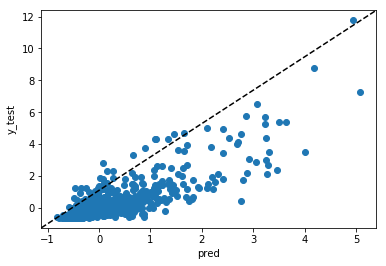

In [4]:
pred = kr.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [5]:
#Metrics
print("MSE: {0:0.4f}".format(mean_squared_error(y_test, pred)))
print("R2:  {0:0.4f}".format(r2_score(y_test, pred, multioutput='variance_weighted')))

MSE: 0.3525
R2:  0.6944
